Part 1


In [9]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize

days= np.genfromtxt("./ASTR19_Data.txt",dtype=float,skip_header= 3,usecols=(0))
time = np.genfromtxt("./ASTR19_Data.txt",dtype=str,skip_header=3,usecols=(1))
measurement = np.genfromtxt("./ASTR19_Data.txt",dtype=float,skip_header=3,usecols=(2))

def f_linevariations(x,a,b,c,d):
    return (a*np.cos((b/c)*x ) +d)



Part 2
Graphing Data and Fitted Function

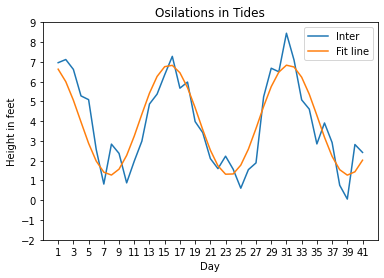

In [10]:
High, Low, HighLow = [],[],[]

x = np.linspace(1,41,41)

error = np.full(41,0.25)

for i in range(0,82,2):
    High.append(measurement[i])
for i in range (1,82,2):
    Low.append(measurement[i])
for i in range (len(High)):
    HighLow.append(High[i]-Low[i])

  
params,params_cov = optimize.curve_fit(f_linevariations,x,HighLow,sigma=error,p0=[3.6,11,29,4])
a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]


y_fit = a_fit*np.cos((b_fit/c_fit)*x)+ d_fit

plt.plot(x,HighLow,label ='Inter')
plt.plot(x,y_fit,label = 'Fit line')
plt.xlabel('Day')
plt.ylabel('Height in feet')
plt.title('Osilations in Tides')
plt.legend()
plt.yticks([-2,-1,0,1,2,3,4,5,6,7,8,9])
plt.xticks([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41])

#plt.errorbar(x,HighLow,yerr=0.25,fmt='o')

plt.savefig('DataandFittedGraph.pdf')
plt.show()

Part 3
Residuals Scatter Plot

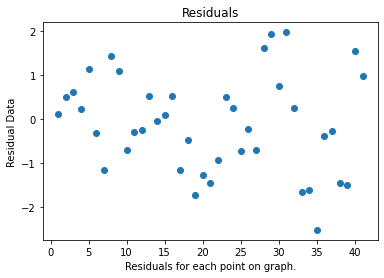

In [11]:
Residuals = []
line0 = np.linspace(0,0,41)
for i in range(len(x)):
    Residuals.append(HighLow[i]- (a_fit*np.cos((b_fit/c_fit)*i)+ d_fit))
    
    
plt.scatter(x,Residuals)

plt.xlabel('Residuals for each point on graph.')
plt.ylabel('Residual Data')
plt.title('Residuals')
plt.savefig('Residual.pdf')
plt.show()


Part 3
Residuals Histogram

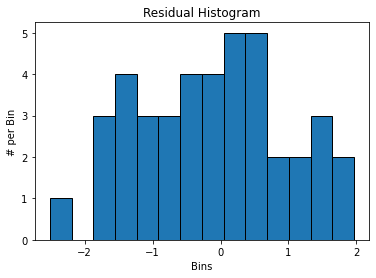

In [12]:
n_bins = 14

plt.hist(Residuals,bins=n_bins,edgecolor = 'black')
plt.xlabel('Bins')
plt.ylabel('# per Bin')
plt.title('Residual Histogram')

plt.show()

Part 3 Standerd Deviation

In [13]:
deviation = np.std(Residuals)

print('Standard Deviation is:', deviation)
print('Compared to the assumed error of 0.25 the deviation is  is %s higher '%(deviation-error[1]))

Standard Deviation is: 1.0832315366986616
Compared to the assumed error of 0.25 the deviation is  is 0.8332315366986616 higher 


Part 4 Tsunami

In [14]:
Tsunami = 2.0
NewHighLow = []
for item in HighLow:
    NewHighLow.append(item+Tsunami)

  
params,params_cov = optimize.curve_fit(f_linevariations,x,HighLow,sigma=error,p0=[8,16,39,10])
a_fits = params[0]
b_fits = params[1]
c_fits = params[2]
d_fits = params[3]

y_fits = a_fits*np.cos((b_fits/c_fits)*x)+ d_fits


Residualss = []
line0 = np.linspace(0,0,41)
for i in range(len(x)):
    Residualss.append(NewHighLow[i]- (a_fits*np.cos((b_fits/c_fits)*i)+ d_fits))
    
newdeviation = np.std(Residualss)
   
print('The Tsunami increased every wave by around 2 deviations which i s a significant amount.')



The Tsunami increased every wave by around 2 deviations which i s a significant amount.
